In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs) # zip function packs the lats and lngs as tuples of paired lats(0)/lngs(1)
lat_lngs # output is a zip object in memory

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)

613

In [5]:
# Import the datetime module from the datetime library
from datetime import datetime 

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    

    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                            "Lat": city_lat,
                            "Lng": city_lng,
                            "Max Temp": city_max_temp,
                            "Humidity": city_humidity,
                            "Cloudiness": city_clouds,
                            "Wind Speed": city_wind,
                            "Country": city_country,
                            "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port blair
Processing Record 2 of Set 1 | saint george
Processing Record 3 of Set 1 | san patricio
Processing Record 4 of Set 1 | bathsheba
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | pevek
Processing Record 7 of Set 1 | rio grande
Processing Record 8 of Set 1 | banjar
Processing Record 9 of Set 1 | platteville
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | thinadhoo
Processing Record 12 of Set 1 | mersing
Processing Record 13 of Set 1 | ottawa
Processing Record 14 of Set 1 | hobart
Processing Record 15 of Set 1 | qaanaaq
Processing Record 16 of Set 1 | tazovskiy
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | busselton
Processing Record 19 of Set 1 | chokurdakh
Processing Record 20 of Set 1 | morondava
Processing Record 21 of Set 1 | mar del plata
Processing Record 22 of Set 1 | sanming
Processing Record 23 of Set 1 | bethe

Processing Record 36 of Set 4 | nabire
Processing Record 37 of Set 4 | esperance
Processing Record 38 of Set 4 | yunyang
Processing Record 39 of Set 4 | cabedelo
Processing Record 40 of Set 4 | torrevieja
Processing Record 41 of Set 4 | paragould
Processing Record 42 of Set 4 | hervey bay
Processing Record 43 of Set 4 | mildmay
Processing Record 44 of Set 4 | marawi
Processing Record 45 of Set 4 | lavrentiya
Processing Record 46 of Set 4 | high level
Processing Record 47 of Set 4 | boden
Processing Record 48 of Set 4 | oranjemund
Processing Record 49 of Set 4 | torrelavega
Processing Record 50 of Set 4 | talnakh
Processing Record 1 of Set 5 | kavieng
Processing Record 2 of Set 5 | tiksi
Processing Record 3 of Set 5 | halalo
City not found. Skipping...
Processing Record 4 of Set 5 | bengkulu
Processing Record 5 of Set 5 | camacha
Processing Record 6 of Set 5 | cidreira
Processing Record 7 of Set 5 | labytnangi
Processing Record 8 of Set 5 | vila velha
Processing Record 9 of Set 5 | paya

Processing Record 28 of Set 8 | fulton
Processing Record 29 of Set 8 | eureka
Processing Record 30 of Set 8 | tadine
Processing Record 31 of Set 8 | imeni poliny osipenko
Processing Record 32 of Set 8 | iqaluit
Processing Record 33 of Set 8 | sinnamary
Processing Record 34 of Set 8 | leh
Processing Record 35 of Set 8 | svetlogorsk
Processing Record 36 of Set 8 | nikolskoye
Processing Record 37 of Set 8 | taft
Processing Record 38 of Set 8 | ciudad bolivar
Processing Record 39 of Set 8 | suluq
Processing Record 40 of Set 8 | attawapiskat
City not found. Skipping...
Processing Record 41 of Set 8 | port shepstone
Processing Record 42 of Set 8 | shadegan
Processing Record 43 of Set 8 | hofn
Processing Record 44 of Set 8 | novyy urengoy
Processing Record 45 of Set 8 | petatlan
Processing Record 46 of Set 8 | lolua
City not found. Skipping...
Processing Record 47 of Set 8 | sotouboua
Processing Record 48 of Set 8 | pedernales
Processing Record 49 of Set 8 | high rock
Processing Record 50 of 

Processing Record 19 of Set 12 | qesarya
Processing Record 20 of Set 12 | kavos
Processing Record 21 of Set 12 | yakeshi
Processing Record 22 of Set 12 | djibo
Processing Record 23 of Set 12 | isilkul
Processing Record 24 of Set 12 | santa maria da vitoria
Processing Record 25 of Set 12 | volchikha
Processing Record 26 of Set 12 | svetlyy
Processing Record 27 of Set 12 | shwebo
Processing Record 28 of Set 12 | dharchula
Processing Record 29 of Set 12 | troitsko-pechorsk
Processing Record 30 of Set 12 | teguldet
Processing Record 31 of Set 12 | mestia
Processing Record 32 of Set 12 | copiapo
Processing Record 33 of Set 12 | anadyr
Processing Record 34 of Set 12 | chumikan
Processing Record 35 of Set 12 | cristuru secuiesc
Processing Record 36 of Set 12 | samarai
Processing Record 37 of Set 12 | tumannyy
City not found. Skipping...
Processing Record 38 of Set 12 | inverell
Processing Record 39 of Set 12 | port keats
Processing Record 40 of Set 12 | neuquen
Processing Record 41 of Set 12 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Blair,11.6667,92.7500,81.66,83,90,16.42,IN,2021-09-13 17:06:49
1,Saint George,37.1041,-113.5841,93.67,22,1,0.00,US,2021-09-13 17:06:03
2,San Patricio,28.0170,-97.5169,82.26,83,100,20.96,US,2021-09-13 17:06:50
3,Bathsheba,13.2167,-59.5167,88.41,70,40,10.36,BB,2021-09-13 17:06:50
4,Rikitea,-23.1203,-134.9692,73.44,78,28,9.04,PF,2021-09-13 17:06:51
5,Pevek,69.7008,170.3133,34.11,97,100,11.77,RU,2021-09-13 17:06:51
6,Rio Grande,-32.0350,-52.0986,64.51,98,100,6.33,BR,2021-09-13 17:02:43
7,Banjar,-8.1900,114.9675,80.46,89,48,2.95,ID,2021-09-13 17:06:52
8,Platteville,42.7342,-90.4785,75.13,94,75,10.36,US,2021-09-13 17:06:52
9,Ushuaia,-54.8000,-68.3000,40.62,82,100,8.79,AR,2021-09-13 17:06:52


In [12]:
# Confirm row count > 500 cities
len(city_data_df)

571

In [13]:
# Reorder columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Blair,IN,2021-09-13 17:06:49,11.6667,92.7500,81.66,83,90,16.42
1,Saint George,US,2021-09-13 17:06:03,37.1041,-113.5841,93.67,22,1,0.00
2,San Patricio,US,2021-09-13 17:06:50,28.0170,-97.5169,82.26,83,100,20.96
3,Bathsheba,BB,2021-09-13 17:06:50,13.2167,-59.5167,88.41,70,40,10.36
4,Rikitea,PF,2021-09-13 17:06:51,-23.1203,-134.9692,73.44,78,28,9.04
...,...,...,...,...,...,...,...,...,...
566,Rabak,SD,2021-09-13 17:10:43,13.1809,32.7400,80.89,66,100,9.28
567,Leninskoye,KZ,2021-09-13 17:10:43,41.7589,69.3864,73.33,24,1,5.70
568,Komsomolskiy,UZ,2021-09-13 17:10:43,40.4272,71.7189,70.52,35,1,4.61
569,Abu Samrah,SY,2021-09-13 17:10:44,35.3029,37.1841,78.12,40,0,11.14


In [14]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

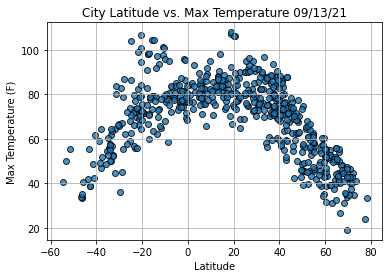

In [16]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

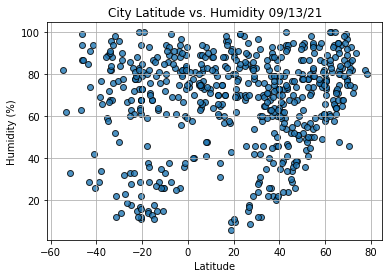

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

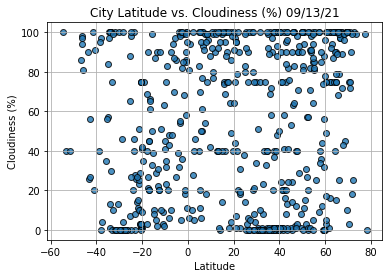

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

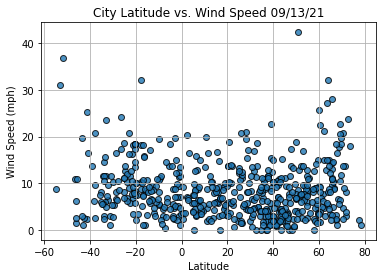

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()